In [ ]:
# dataset = https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf/data?select=tomato

In [ ]:
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders


In [29]:
path = Path('tomato')

In [30]:
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='val',
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

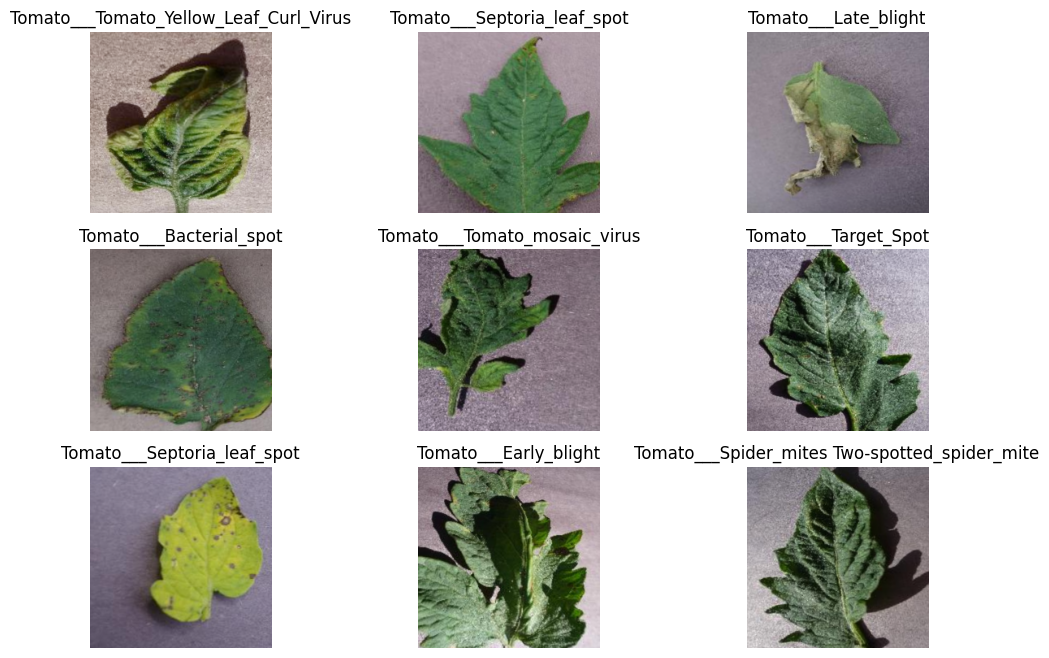

In [41]:
dls.show_batch(max_n=9, figsize=(12, 8))

In [32]:
learn = vision_learner(dls, resnet34, metrics=accuracy)   

In [33]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.882420,0.487240,0.849000,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.292906,0.190377,0.937000,01:14
1,0.137143,0.075652,0.977000,01:14
2,0.065483,0.069192,0.977000,01:14
3,0.037996,0.059872,0.978000,01:14


In [47]:
class_names = dls.vocab
abbreviated_class_names = {
    'Tomato___Bacterial_spot': 'Bacterial Spot',
    'Tomato___Early_blight': 'Early Blight',
    'Tomato___Late_blight': 'Late Blight',
    'Tomato___Leaf_Mold': 'Leaf Mold',
    'Tomato___Septoria_leaf_spot': 'Septoria Leaf Spot',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Spider Mites',
    'Tomato___Target_Spot': 'Target Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Yellow Leaf Curl Virus',
    'Tomato___Tomato_mosaic_virus': 'Mosaic Virus',
    'Tomato___healthy': 'Healthy'
}

abbreviated_class_names_list = [abbreviated_class_names[name] for name in class_names]

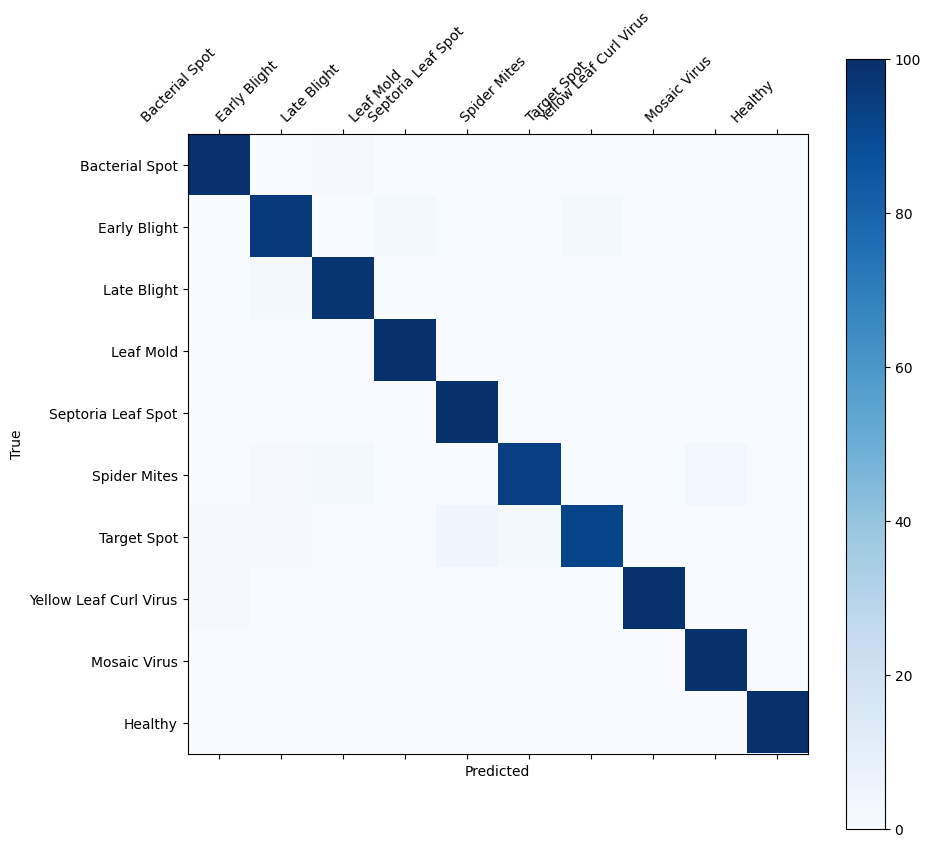

In [48]:
interp = ClassificationInterpretation.from_learner(learn)


def plot_confusion_matrix(interp, class_names, figsize=(10, 10), fontsize=10):
    cm = interp.confusion_matrix()
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap='Blues')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=fontsize)
    ax.set_yticklabels(class_names, fontsize=fontsize)

    plt.xlabel('Predicted', fontsize=fontsize)
    plt.ylabel('True', fontsize=fontsize)
    plt.show()

plot_confusion_matrix(interp, abbreviated_class_names_list)

In [60]:
learn.export('fastai_cnn_v1.pkl')